In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLars, SGDRegressor, Perceptron
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [213]:
df = pd.read_csv("../Datasets/bike.csv")
df = df.drop(["dteday", "instant", "casual", "registered"], axis=1)

df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


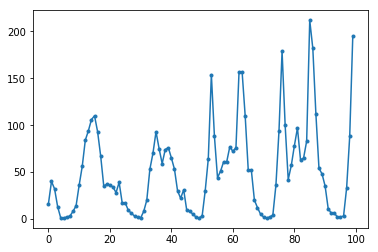

In [234]:
plt.plot(df['cnt'].iloc[0:100], marker='.')
plt.show()

In [241]:
train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

display(train.shape)
display(test.shape)

train_x = train.drop('cnt', axis=1)
train_y = train['cnt']
test_x = test.drop('cnt', axis=1)
test_y = test['cnt']

(12165, 13)

(5214, 13)

In [242]:
def test_model(model):
    model.fit(train_x, train_y)
    score = model.score(test_x, test_y)
    sse = mean_squared_error(test_y, model.predict(test_x))
    
    display("Model={}, score={}, sse={}".format(model.__class__.__name__, score, sse))

In [243]:
lr = LinearRegression()
test_model(lr)

'Model=LinearRegression, score=0.38716067385039854, sse=19360.109567445543'

In [244]:
ridge = Ridge(alpha=0.1)
test_model(ridge)

'Model=Ridge, score=0.3871587721338109, sse=19360.169644271442'

In [245]:
lasso = Lasso(alpha=0.01)
test_model(lasso)

'Model=Lasso, score=0.3871557491562859, sse=19360.265142673074'

In [247]:
elasticNet = ElasticNet(alpha=0.01)
test_model(elasticNet)

'Model=ElasticNet, score=0.38582715994950345, sse=19402.23639274777'

In [248]:
lassoLars = LassoLars(alpha=0.01)
test_model(lassoLars)

'Model=LassoLars, score=0.38701002474603585, sse=19364.86869931298'

In [268]:
sgd = SGDRegressor(alpha=0.01)
test_model(sgd)

c:\users\j.vargovsky\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


'Model=SGDRegressor, score=0.37488076662961, sse=19748.042161076934'

In [225]:
perceptron = Perceptron(n_iter=50)
test_model(perceptron)

c:\users\j.vargovsky\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


'Model=Perceptron, score=0.0034522439585730723, sse=97619.76256233218'

In [246]:
svr = SVR(C=100)
test_model(svr)

c:\users\j.vargovsky\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'Model=SVR, score=0.8981935286080966, sse=3216.152026675125'

In [249]:
rfr = RandomForestRegressor(n_estimators=100)
test_model(rfr)

'Model=RandomForestRegressor, score=0.9447401641817589, sse=1745.7046740813146'